<a href="https://colab.research.google.com/github/GeorgeSere/Projects/blob/main/%D0%98%D1%81%D1%81%D0%BB%D0%B5%D0%B4%D0%BE%D0%B2%D0%B0%D0%BD%D0%B8%D0%B5_%D0%BD%D0%B5%D0%B4%D0%B2%D0%B8%D0%B6%D0%B8%D0%BC%D0%BE%D1%81%D1%82%D0%B8_%D0%B2_%D0%A1%D0%B0%D0%BD%D0%BA%D1%82_%D0%9F%D0%B5%D1%82%D0%B5%D1%80%D0%B1%D1%83%D1%80%D0%B3%D0%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ТЕМПЛЕЙТ

In [ ]:
import pandas as pd
import numpy as np
import io
import sqlite3
import seaborn as sns

In [ ]:
# check
import matplotlib.pyplot as plt

In [ ]:
con = sqlite3.connect('db')

In [ ]:
def select(sql):
  return pd.read_sql(sql,con)

In [ ]:
cur = con.cursor()

# **ПРОЕКТ "ИССЛЕДОВАНИЕ РЫНКА НЕДВИЖИМОСТИ САНКТ-ПЕТЕРБУРГА"**

# Описание проекта:

В вашем распоряжении данные сервиса по продаже недвижимости — архив объявлений за несколько лет о продаже квартир в Санкт-Петербурге и соседних населённых пунктах.
Задача — выполнить предобработку данных и изучить их, чтобы найти интересные особенности и зависимости, которые существуют на рынке недвижимости.
О каждой квартире в базе содержится два типа данных: добавленные пользователем и картографические. Например, к первому типу относятся площадь квартиры, её этаж и количество балконов, ко второму — расстояния до центра города, аэропорта и ближайшего парка.

# Знакомство с данными:


In [ ]:

from google.colab import files
uploaded = files.upload()
df = pd.read_csv(io.BytesIO(uploaded['real_estate_data.csv']), sep='\t')

In [ ]:
df.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [ ]:
df.sample(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
22380,13,9600000.0,69.6,2017-11-26T00:00:00,2,NaN,13.0,34.00,11,NaN,...,11.3,2.0,Санкт-Петербург,17950.0,16952.0,1.0,679.0,3.0,361.0,19.0
20403,11,4200000.0,75.0,2018-03-22T00:00:00,4,2.50,9.0,49.50,2,NaN,...,6.5,NaN,Сертолово,NaN,NaN,NaN,NaN,NaN,NaN,230.0
8110,12,5200000.0,65.0,2016-09-13T00:00:00,3,2.50,5.0,39.00,1,NaN,...,7.8,2.0,Пушкин,12562.0,24715.0,1.0,309.0,0.0,NaN,417.0
12774,16,1500000.0,72.0,2017-10-13T00:00:00,3,NaN,5.0,42.00,4,NaN,...,8.0,NaN,Сланцы,NaN,NaN,NaN,NaN,NaN,NaN,271.0
5056,6,11790000.0,102.0,2017-05-15T00:00:00,3,2.75,16.0,58.30,7,NaN,...,17.3,2.0,Санкт-Петербург,33756.0,13625.0,0.0,NaN,0.0,NaN,715.0
2939,7,6550000.0,64.3,2018-01-12T00:00:00,2,3.75,7.0,48.80,3,NaN,...,6.0,NaN,Санкт-Петербург,21399.0,2009.0,2.0,320.0,1.0,293.0,98.0
21917,11,3800000.0,44.6,2018-08-18T00:00:00,2,NaN,5.0,30.40,4,NaN,...,7.0,NaN,Санкт-Петербург,42365.0,9857.0,3.0,510.0,1.0,565.0,59.0
7490,17,5600000.0,53.4,2018-10-02T00:00:00,2,NaN,25.0,30.59,17,NaN,...,10.3,NaN,Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,59.0
2978,2,8400000.0,87.3,2016-01-25T00:00:00,3,NaN,12.0,50.50,2,False,...,12.4,0.0,Санкт-Петербург,34728.0,14597.0,0.0,NaN,0.0,NaN,279.0
20885,11,1650000.0,44.0,2018-10-24T00:00:00,1,2.50,5.0,17.40,5,NaN,...,14.2,1.0,Волхов,NaN,NaN,NaN,NaN,NaN,NaN,104.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

После первого знакомства с данными мы видим, что:

*   Один столбец назван некорректно
*   Ряд столбцов содержат пропуски
*   Вероятно некоторые столбцы имеют неверный тип данных



## Гистограммы

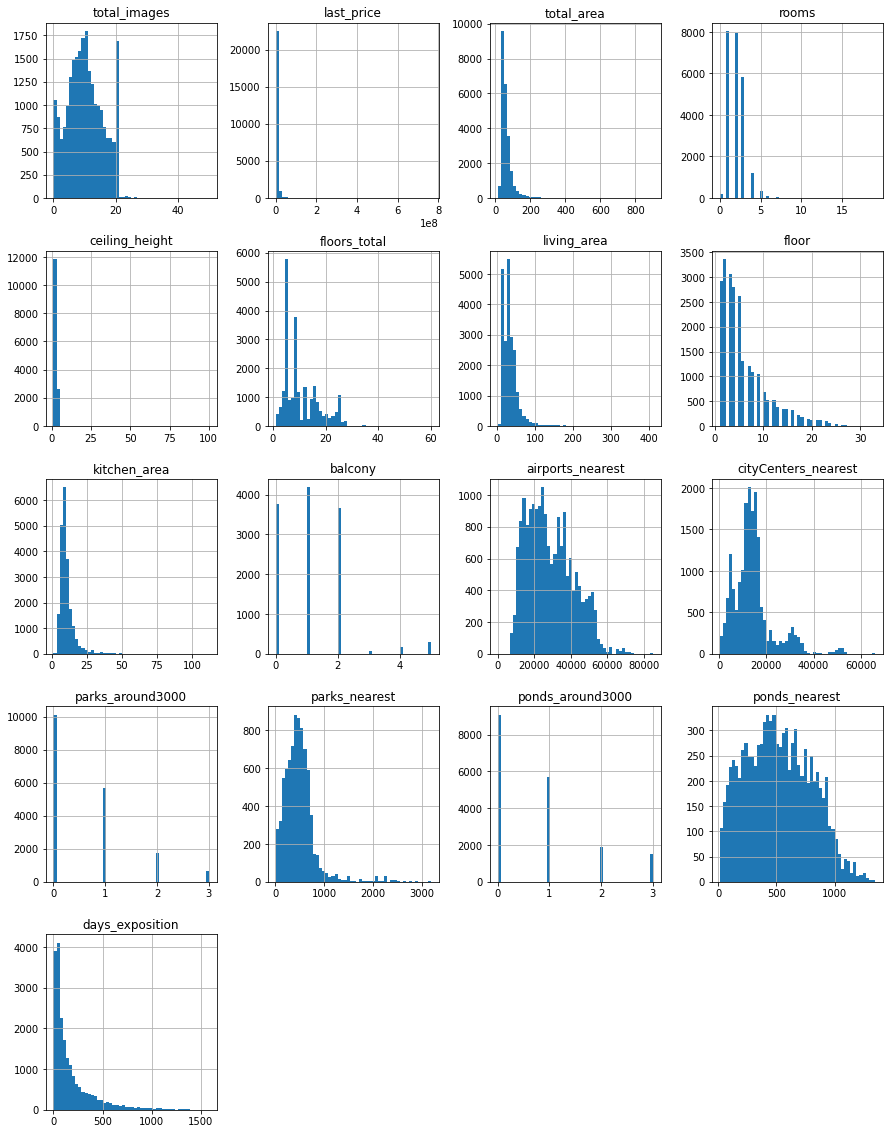

In [ ]:
df.hist(bins = 50, figsize=(15, 20));

# Предобработка данных:

In [ ]:


def pass_value_barh(df):
    try:
        (
            (df.isna().mean()*100)
            .to_frame()
            .rename(columns = {0:'space'})
            .query('space > 0')
            .sort_values(by = 'space', ascending = True)
            .plot(kind = 'barh', figsize = (19,6), rot = -5, legend = False, fontsize = 16)
            .set_title('Пример' + "\n", fontsize = 22, color = 'SteelBlue')    
        );    
    except:
        print('пропусков не осталось')

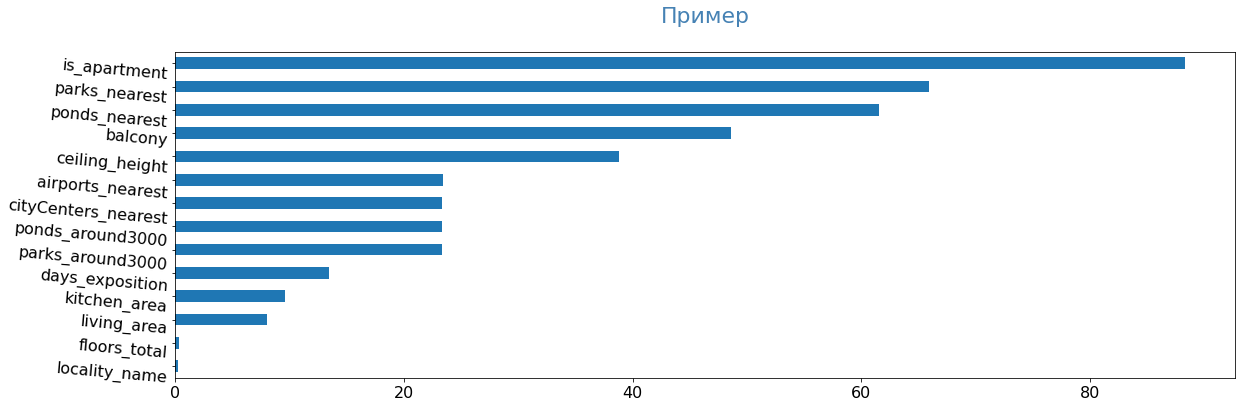

In [ ]:
pass_value_barh(df)

Переименуем столбец "cityCenters_nearest", преобразуем его в снейк кейс:

In [ ]:
df = df.rename(columns={"cityCenters_nearest": "city_centers_nearest"})

**Дата и время:**

In [ ]:
df['first_day_exposition']=pd.to_datetime(df['first_day_exposition'],format='%Y-%m-%dT%H:%M:%S')

In [ ]:
df['first_day_exposition'].head(3)

0   2019-03-07
1   2018-12-04
2   2015-08-20
Name: first_day_exposition, dtype: datetime64[ns]

**Изменим тип данных:**

Изменим тип на **int** там, где дробной части быть не должно или она нам не интересна

In [ ]:
df['days_exposition'] = df['days_exposition'].round(0)

In [ ]:
df['is_apartment']=df['is_apartment'].fillna(False)

In [ ]:
df['balcony'] = df['balcony'].fillna(0)

In [ ]:
df['parks_around3000'] = df['parks_around3000'].fillna(0)

In [ ]:
df['days_exposition'] = df['days_exposition'].fillna(0)

In [ ]:
df['ponds_around3000'] = df['ponds_around3000'].fillna(0)

In [ ]:
df['last_price']=df['last_price'].astype('int')
df['balcony']=df['balcony'].astype('int')
df['parks_around3000']=df['parks_around3000'].astype('Int64')
df['airports_nearest']=df['airports_nearest'].astype('Int64') 
df['parks_nearest']=df['parks_nearest'].astype('Int64') 
df['ponds_around3000']= df['ponds_around3000'].astype('Int64')
df['ponds_nearest']= df['ponds_nearest'].astype('Int64')
df['days_exposition']=df['days_exposition'].astype('int')

In [ ]:
#columns = ['last_price', 'balcony', 'parks_around3000', 'ponds_around3000', 'parks_nearest', 'ponds_nearest', 'airports_nearest', 'city_centers_nearest', 'days_exposition', 'floors_total']
#for column in columns:
    #df[column] = df[column].astype(int)

Проверим:

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  int64         
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        14504 non-null  float64       
 6   floors_total          23613 non-null  float64       
 7   living_area           21796 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          23699 non-null  bool          
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          21421 non-null  float64       
 13  balcony         

Кажется теперь дроби остались только там, где нужно

**Высота потолка**

In [ ]:
df['ceiling_height'].isna().sum()

9195

In [ ]:
df['ceiling_height'].unique()

array([  2.7 ,    nan,   3.03,   2.5 ,   2.67,   2.56,   3.05,   2.75,
         2.6 ,   2.9 ,   2.8 ,   2.55,   3.  ,   2.65,   3.2 ,   2.61,
         3.25,   3.45,   2.77,   2.85,   2.64,   2.57,   4.15,   3.5 ,
         3.3 ,   2.71,   4.  ,   2.47,   2.73,   2.84,   3.1 ,   2.34,
         3.4 ,   3.06,   2.72,   2.54,   2.51,   2.78,   2.76,  25.  ,
         2.58,   3.7 ,   2.52,   5.2 ,   2.87,   2.66,   2.59,   2.  ,
         2.45,   3.6 ,   2.92,   3.11,   3.13,   3.8 ,   3.15,   3.55,
         3.16,   3.62,   3.12,   2.53,   2.74,   2.96,   2.46,   5.3 ,
         5.  ,   2.79,   2.95,   4.06,   2.94,   3.82,   3.54,   3.53,
         2.83,   4.7 ,   2.4 ,   3.38,   3.01,   5.6 ,   3.65,   3.9 ,
         3.18,   3.35,   2.3 ,   3.57,   2.48,   2.62,   2.82,   3.98,
         2.63,   3.83,   3.52,   3.95,   3.75,   2.88,   3.67,   3.87,
         3.66,   3.85,   3.86,   4.19,   3.24,   4.8 ,   4.5 ,   4.2 ,
         3.36,  32.  ,   3.08,   3.68,   3.07,   3.37,   3.09,   8.  ,
      

Мы видим, что данные о высоте потолка заполнены в формате **float** в **метрах**, имеется **9195** пропусков и несколько значений, которые на первый взгляд кажутся аномальными **(24. , 100. , 14. , 27.5  и т.д.)**

Отсортируем и выведем аномальные значения больше, чем **7**




In [ ]:
rows = df['ceiling_height']>7
df['ceiling_height'][rows].sort_values(ascending=False)

22869    100.0
3148      32.0
22336     32.0
21377     27.5
22938     27.0
4876      27.0
21824     27.0
5246      27.0
5807      27.0
20478     27.0
10773     27.0
17857     27.0
5669      26.0
18545     25.0
355       25.0
11285     25.0
9379      25.0
6246      25.0
4643      25.0
14382     25.0
5076      24.0
20507     22.6
17496     20.0
15061     14.0
22309     10.3
5863       8.3
15743      8.0
17442      8.0
3474       8.0
Name: ceiling_height, dtype: float64

У нас таблица с данными о кватирах, коммерческой и промышленной недвижимости здесь нет, так что высота потолков более **8.3** метров кажется неправдоподобной (допустим, что у нас могут быть многоуровневые необычные квартиры с высокими потолками. В сервисе **Яндекс.Недвижимость** мне удалось быстро обнаружить объекты недвижимсоти с высотой потолка **6м**, допустим, что единичные объекты с высотой потолка до **8.3м** тоже могут встречаться)

Предположим, что значения от **22.6** до **32.0** являются следствием "уехавшией" точки и мы можем восстановить данные разделив значение на **10**

In [ ]:
df.loc[(df['ceiling_height']>=22.6) & (df['ceiling_height'] <= 32.0),'ceiling_height'] /=10


Однако со значениями **10.3**, **14.0**, **20.0** и **100.0** такой метод явно не сработает, их лучше будет удалить.

In [ ]:
df = df.loc[(df['ceiling_height']!=10.3) & (df['ceiling_height'] != 100) & (df['ceiling_height'] != 14) & (df['ceiling_height'] != 20)]

In [ ]:
rows = df['ceiling_height']<2
df['ceiling_height'][rows]

5712     1.20
16934    1.75
22590    1.00
Name: ceiling_height, dtype: float64

Аномально малые значения мы тоже удалим

### check nan

In [ ]:
# check
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23695 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23695 non-null  int64         
 1   last_price            23695 non-null  int64         
 2   total_area            23695 non-null  float64       
 3   first_day_exposition  23695 non-null  datetime64[ns]
 4   rooms                 23695 non-null  int64         
 5   ceiling_height        14500 non-null  float64       
 6   floors_total          23609 non-null  float64       
 7   living_area           21792 non-null  float64       
 8   floor                 23695 non-null  int64         
 9   is_apartment          23695 non-null  bool          
 10  studio                23695 non-null  bool          
 11  open_plan             23695 non-null  bool          
 12  kitchen_area          21418 non-null  float64       
 13  balcony         

In [ ]:
inds = (df['ceiling_height']>2) | (df['ceiling_height'].isnull())
df = df.loc[inds, :]

In [ ]:
# check
df.shape[0]

23681

Проверяем:

In [ ]:
rows = df['ceiling_height']<2
df['ceiling_height'][rows].count()

0

In [ ]:
rows = df['ceiling_height']>8.3
df['ceiling_height'][rows].count()

0

Успешно избавились от пропусков

**Число этажей**

In [ ]:
df['floors_total'].isna().sum()

86

In [ ]:
df['floors_total'].unique()

array([16., 11.,  5., 14., 12., 26., 24., 27.,  9.,  6., 17., 25.,  3.,
       23., 19., 18.,  4., 22.,  8.,  2., 10.,  7., 13., 15., nan, 20.,
       28., 36., 21., 35., 34., 60.,  1., 29., 33., 52.])

Пропусков здесь  немного - **86**

Можно было бы заполнить эти пропуски **медианой** или **значением этажа** на котором находится квартира, но мне такой метод в данном случае кажется грубым и ненужным, так что удалим эти значения.


In [ ]:
df = df.dropna(subset=['floors_total'])

Проверим:

In [ ]:
df['floors_total'].isna().sum()

0

**Жилая площадь и площадь кухни:**

In [ ]:
df['living_area'].isna().sum()

1868

In [ ]:
df['living_area'].unique()

array([51.  , 18.6 , 34.3 , ..., 31.65, 13.59, 42.55])

In [ ]:
df['kitchen_area'].isna().sum()

2228

In [ ]:
df['kitchen_area'].unique()

array([ 25.  ,  11.  ,   8.3 ,    nan,  41.  ,   9.1 ,  14.4 ,  18.9 ,
         8.81,   6.5 ,   8.5 ,   6.  ,   9.  ,   5.2 ,   8.  ,   7.6 ,
         5.6 ,  12.  ,   5.7 ,   6.1 ,  19.6 ,  15.  ,   7.  ,   9.2 ,
        11.7 ,  13.4 ,  17.  ,   6.3 ,  11.6 ,   8.8 ,  10.  ,  17.6 ,
         7.5 ,   9.5 ,  50.  ,  15.5 ,  10.7 ,  11.1 ,  20.  ,  11.9 ,
        16.  ,   5.3 ,  11.5 ,   7.2 ,   6.2 ,  10.4 ,   7.1 ,   4.9 ,
         7.3 ,  11.95,  10.2 ,   6.4 ,   5.5 ,  13.  ,   8.4 ,  23.6 ,
        10.8 ,  18.3 ,   5.  ,   8.2 ,  24.  ,  23.8 ,   6.6 ,  26.85,
        15.4 ,   7.8 ,  33.8 ,   5.4 ,  12.72,  12.2 ,  19.  ,  12.4 ,
         7.9 ,  10.3 ,   9.8 ,  17.5 ,  14.7 ,  20.91,  21.3 ,  10.6 ,
        10.9 ,   9.7 ,   7.7 ,  12.5 ,  11.4 ,   8.6 ,  11.24,  14.1 ,
        15.7 ,  13.29,  14.  ,  12.9 ,  12.7 ,  16.5 ,   9.36,  21.5 ,
        35.  ,  10.5 ,   8.7 ,  19.3 ,  21.4 ,  40.  ,  49.2 ,  11.52,
         8.9 ,   9.6 ,  30.  ,  14.2 ,   8.1 ,  10.44,   4.5 ,  16.3 ,
      

Проверим одну гипотезу:

In [ ]:
df['open_plan'].value_counts()

False    23528
True        67
Name: open_plan, dtype: int64

Такое количество пропусков никак не совпадает с числом объектов со свободной планировкой, так что мы не можем предположить причину этих пропусков.

**Является ли объект аппартаментами:**

In [ ]:
df['is_apartment'].isna().sum()

0

In [ ]:
df['is_apartment'].unique()

array([False,  True])

Скорее всего пропуски являются следствием неполного заполнения данных в объявлении. Пропуски мы заполним значением **False**

In [ ]:
#df['is_apartment']=df['is_apartment'].fillna(False)

Проверяем:

In [ ]:
df['is_apartment'].isna().sum()

0

**Число балконов:**

In [ ]:
df['balcony'].isna().sum()

0

In [ ]:
df['balcony'].unique()

array([0, 2, 1, 5, 4, 3])

Предположим, что пользователи не заполняли число балконов тогда, когда их в объекте нет, заменим пропуски на **0**

Проверим:

In [ ]:
df['balcony'].isna().sum()

0

**Название населённого пункта:**

In [ ]:
df['locality_name'].isna().sum()

48

Отсутствие такого важного параметра явно помешает исследованию, удалим эти строки:

In [ ]:
df = df.dropna(subset=['locality_name'])

Проверим:

In [ ]:
df['locality_name'].isna().sum()

0

In [ ]:
df['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [ ]:
len(df['locality_name'].unique())

364

Визуально воспринять подобную информацию сложно. При помощи могущественного интрумента **Ctrl+F** мне удалось выяснить, что есть проблема с буквами **"е"** и **"ё"**, приведём значения к **нижнему регистру**, а затем произведём **замену**:

In [ ]:
df['locality_name'] = df['locality_name'].str.lower()

In [ ]:
df['locality_name'] = df['locality_name'].str.replace('ё', 'е', regex=True)

Проверим:

In [ ]:
len(df['locality_name'].unique())

330

Неявных дубликатов стало немного меньше. Но кажется, что больше мы не можем ничего сделать. Возможно населенные пункты с одним названием могли быть в разных случаях записаны как деревня, пгт, посёлок и пр. но такая проверка займёт неразумно много времени.

In [ ]:
# check
df.locality_name.nunique()

330

**Ближайшие объекты инфраструктуры:**

In [ ]:
df['city_centers_nearest'].isna().sum()

5492

In [ ]:
df['city_centers_nearest'].unique()

array([16028., 18603., 13933., ..., 27977.,  7262.,  6263.])

In [ ]:
df['airports_nearest'].isna().sum()

5515

In [ ]:
df['airports_nearest'].unique()

<IntegerArray>
[18863, 12817, 21741, 28098, 31856,  <NA>, 52996, 23982, 50898, 38357,
 ...
 18370, 20933, 35772, 20503, 36474, 15823, 28323, 11751, 20151, 24665]
Length: 8251, dtype: Int64

In [ ]:
df['parks_nearest'].isna().sum()

15523

In [ ]:
df['parks_nearest'].unique()

<IntegerArray>
[ 482, <NA>,   90,   84,  112,  310,  294,  590,  420,  759,
 ...
  757,  268,   80, 2768, 2009,  847,  760, 1167,    4, 2984]
Length: 995, dtype: Int64

In [ ]:
df['ponds_nearest'].isna().sum()

14517

In [ ]:
df['ponds_nearest'].unique()

<IntegerArray>
[ 755, <NA>,  574,  234,   48,  553,  298,   96,  296,  859,
 ...
 1156,  999,  986,  188, 1077,  827,  959,   40,   30, 1134]
Length: 1097, dtype: Int64

**Объекты инфрастуктуры в радиусе 3 км:**

Здесь мы с большой вероятностью можем заменить **пропуски** на **0**, тк эти данные заполняются автоматически и скорее всего таких объектов в заданном радиусе просто нет:

In [ ]:
df['parks_around3000'].isna().sum()

0

In [ ]:
df['parks_around3000'].unique()

<IntegerArray>
[1, 0, 2, 3]
Length: 4, dtype: Int64

Заполняем и проверяем:

In [ ]:
df['parks_around3000'].isna().sum()

0

In [ ]:
df['ponds_around3000'].isna().sum()

0

In [ ]:
df['ponds_around3000'].unique()

<IntegerArray>
[2, 0, 3, 1]
Length: 4, dtype: Int64

Заполняем и проверяем:

In [ ]:
df['ponds_around3000'].isna().sum()

0

**Сколько дней выставлено объявление:**

In [ ]:
df['days_exposition'].isna().sum()

0

In [ ]:
df['days_exposition'].unique()

array([   0,   81,  558, ..., 1360, 1007,  971])

Скорее всего пропуск появляется у объявлений с момента публикации которых не прошло суток, заменим значения на **0**:

Проверим:

In [ ]:
df['days_exposition'].isna().sum()

0

**Проверяем оставшиеся пропуски:**

In [ ]:
df.isnull().sum().sort_values()

total_images                0
ponds_around3000            0
parks_around3000            0
locality_name               0
balcony                     0
open_plan                   0
is_apartment                0
floor                       0
studio                      0
floors_total                0
rooms                       0
first_day_exposition        0
total_area                  0
last_price                  0
days_exposition             0
living_area              1863
kitchen_area             2219
city_centers_nearest     5492
airports_nearest         5515
ceiling_height           9084
ponds_nearest           14517
parks_nearest           15523
dtype: int64

Мы устранили большую часть пропусков и проблем с данными, но не все пропуски мы можем точно объяснить и придумать разумный способ замены, двигаемся дальше.

Напоследок обновим индексацию:

In [ ]:
df = df.reset_index(drop=True)

### check gap

In [ ]:

data = df.copy()

In [ ]:

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23547 entries, 0 to 23546
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23547 non-null  int64         
 1   last_price            23547 non-null  int64         
 2   total_area            23547 non-null  float64       
 3   first_day_exposition  23547 non-null  datetime64[ns]
 4   rooms                 23547 non-null  int64         
 5   ceiling_height        14463 non-null  float64       
 6   floors_total          23547 non-null  float64       
 7   living_area           21684 non-null  float64       
 8   floor                 23547 non-null  int64         
 9   is_apartment          23547 non-null  bool          
 10  studio                23547 non-null  bool          
 11  open_plan             23547 non-null  bool          
 12  kitchen_area          21328 non-null  float64       
 13  balcony         

In [ ]:

data.rooms.value_counts().to_frame()

,rooms
1,7995
2,7892
3,5775
4,1172
5,325
0,194
6,104
7,59
8,12
9,8


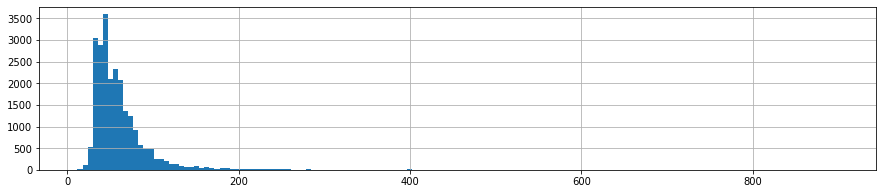

In [ ]:

data.total_area.hist(bins = 150, figsize = (15,3));

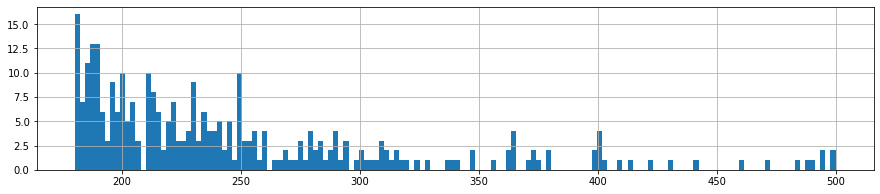

In [ ]:

data.total_area.hist(bins = 150, figsize = (15,3), range = (180,500));

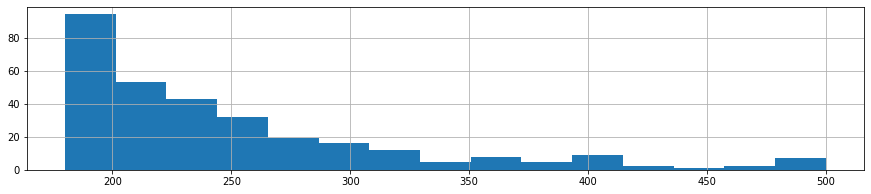

In [ ]:

data.total_area.hist(bins = 15, figsize = (15,3), range = (180,500));

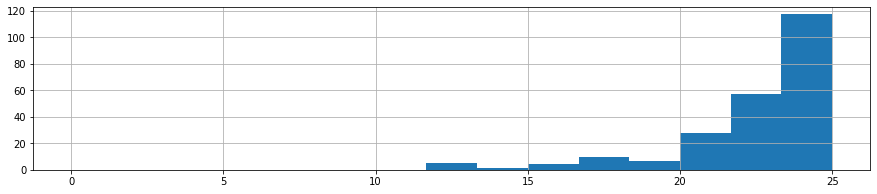

In [ ]:

data.total_area.hist(bins = 15, figsize = (15,3), range = (0,25));

In [ ]:

(
    data[['rooms', 'total_area', 'ceiling_height', 'days_exposition', 'last_price', 'living_area',  
        'kitchen_area', 'floor',   'floors_total']]
    .quantile([0.0012, 0.01, .5, .99, .9988]) 
    .style.format("{:,.2f}")
)

,rooms,total_area,ceiling_height,days_exposition,last_price,living_area,kitchen_area,floor,floors_total
0.0012,0.00,20.00,2.40,0.00,"561,276.00",10.00,3.80,1.00,2.00
0.01,1.00,25.34,2.50,0.00,"1,000,000.00",13.00,5.00,1.00,2.00
0.5,2.00,52.00,2.65,73.00,"4,650,000.00",30.00,9.10,4.00,9.00
0.99,5.00,197.58,3.75,"1,043.00","36,000,000.00",120.00,35.04,23.00,26.00
0.9988,8.00,380.00,4.50,"1,361.74","124,867,296.00",219.96,60.00,26.00,34.74


# Добавляем новые столбцы:

**Цена одного квадратного метра**

In [ ]:
df['price_per_m2']=df['last_price']/df['total_area']

In [ ]:
df['price_per_m2'].head(3)

0    120370.370370
1     82920.792079
2     92785.714286
Name: price_per_m2, dtype: float64

**день недели публикации объявления (0 — понедельник, 1 — вторник и так далее):**

In [ ]:
df['day']=pd.DatetimeIndex(df['first_day_exposition']).weekday

In [ ]:
df['day'].head(5)

0    3
1    1
2    3
3    4
4    1
Name: day, dtype: int64

**месяц публикации объявления:**

In [ ]:
df['month']=pd.DatetimeIndex(df['first_day_exposition']).month

In [ ]:
df['month'].head(5)

0     3
1    12
2     8
3     7
4     6
Name: month, dtype: int64

**год публикации объявления:**

In [ ]:
df['year']=pd.DatetimeIndex(df['first_day_exposition']).year

In [ ]:
df['year'].head(5)

0    2019
1    2018
2    2015
3    2015
4    2018
Name: year, dtype: int64

**тип этажа квартиры (значения — «‎первый», «последний», «другой»):**

Для этого мы напишем функцию

In [ ]:
def floor_type(row):
  if row['floor'] == 1:
        return 'первый'
  if row['floor'] == row['floors_total']:
        return 'последний'
  else:
        return 'другой'

In [ ]:
df['floor_type'] = df.apply(floor_type, axis = 1)

In [ ]:
df['floor_type'].head(10)

0    другой
1    первый
2    другой
3    другой
4    другой
5    другой
6    другой
7    другой
8    другой
9    другой
Name: floor_type, dtype: object

**расстояние до центра города в километрах (переведите из м в км и округлите до целых значений):**

In [ ]:
df['city_centers_nearest_km']=df['city_centers_nearest']/1000
df['city_centers_nearest_km'] = df['city_centers_nearest_km'].round(0)

Можем сразу изменить тип данных:

In [ ]:
df['city_centers_nearest_km']=df['city_centers_nearest_km'].astype('Int64')

In [ ]:
df['city_centers_nearest_km'].head(5)

0    16
1    19
2    14
3     7
4     8
Name: city_centers_nearest_km, dtype: Int64

# Устраняем аномалии:

У нас остались аномальные значения в стобцах: *'rooms', 'total_area', 'ceiling_height', 'days_exposition', 'last_price', 'living_area',  'kitchen_area', 'floors_total'*

Создадим новую переменную:

In [ ]:
df_filtered = df

**Столбец 'rooms' :**


In [ ]:
df.rooms.value_counts()

1     7995
2     7892
3     5775
4     1172
5      325
0      194
6      104
7       59
8       12
9        8
10       3
11       2
14       2
19       1
16       1
12       1
15       1
Name: rooms, dtype: int64

Тут мы смело можем избавиться от аномалий, признав ими квартиры с числом комнат 8 и более:

In [ ]:
df_filtered = df_filtered.query('rooms<8')

Проверяем процент потерь:

In [ ]:
df_filtered.shape[0] / df.shape[0]

0.9986834840956386

**Столбец 'total_area':**

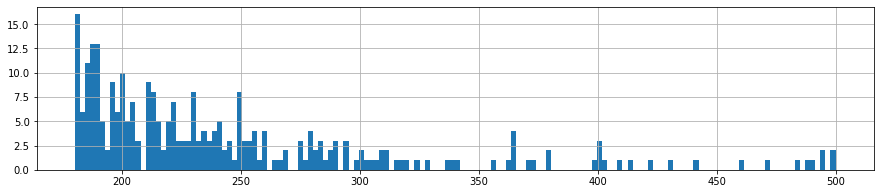

In [ ]:
df_filtered.total_area.hist(bins = 150, figsize = (15,3), range = (180,500));

In [ ]:
print(len(df_filtered.query('total_area>330')))

37


In [ ]:
df_filtered = df_filtered.query('total_area<330')

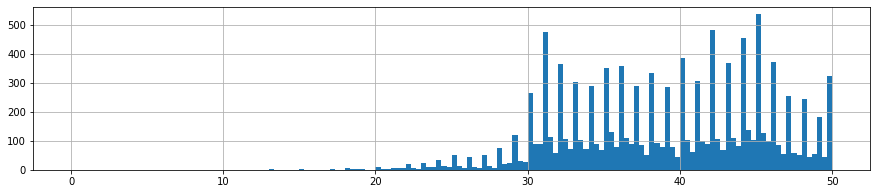

In [ ]:
df_filtered.total_area.hist(bins = 150, figsize = (15,3), range = (0,50));

In [ ]:
print(len(df_filtered.query('total_area<20')))

27


In [ ]:
print(df_filtered['total_area'].isnull().sum())


0


In [ ]:
df_filtered = df_filtered.query('total_area>20')

In [ ]:
df_filtered.shape[0] / df.shape[0]

0.9956257697371215

**Столбец 'ceiling_height':**

<AxesSubplot:>

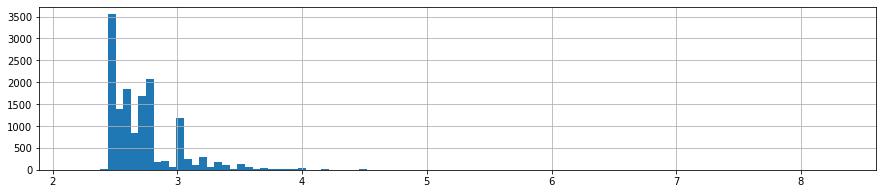

In [ ]:
df_filtered.ceiling_height.hist(bins = 100, figsize = (15,3))

In [ ]:
print(len(df_filtered.query('ceiling_height>4')))

46


In [ ]:
inds = (df_filtered['ceiling_height']<4) | (df_filtered['ceiling_height'].isnull())
df_filtered = df_filtered.loc[inds, :]

In [ ]:
df_filtered.shape[0] / df.shape[0]

0.992100904573831

**Столбец 'days_exposition':**

<AxesSubplot:>

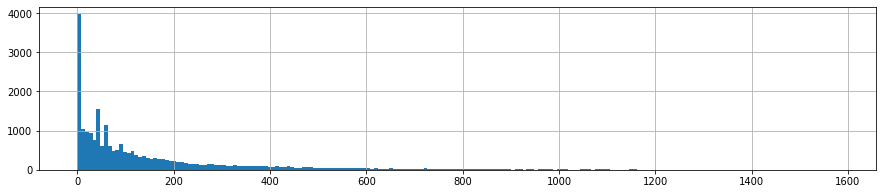

In [ ]:
df_filtered.days_exposition.hist(bins = 200, figsize = (15,3))

In [ ]:
print(len(df_filtered.query('days_exposition>1000')))

270


In [ ]:
inds = (df_filtered['days_exposition']<10000) | (df_filtered['days_exposition'].isnull())
df_filtered = df_filtered.loc[inds, :]

In [ ]:
df_filtered.shape[0] / df.shape[0]

0.992100904573831

<AxesSubplot:>

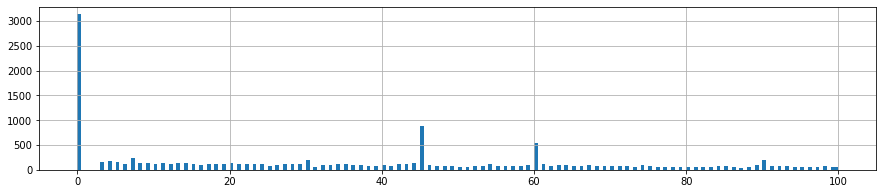

In [ ]:
df_filtered.days_exposition.hist(bins = 200, figsize = (15,3), range=(0,100))

In [ ]:
print(df_filtered['days_exposition'].isnull().count())

23361


In [ ]:
print(len(df_filtered.query('days_exposition<7')))

3734


In [ ]:
df_filtered['days_exposition'].value_counts()

0       3129
45       874
60       536
7        231
30       207
        ... 
1080       1
1064       1
1032       1
1016       1
1391       1
Name: days_exposition, Length: 1136, dtype: int64

In [ ]:
df_filtered.to_sql('df_filtered',con,index=False,if_exists='replace')

In [ ]:
sql = '''SELECT t.* FROM df_filtered t
WHERE t.days_exposition not in (1, 2, 3, 4, 5, 6)
'''
df_filtered= select(sql)

In [ ]:
df_filtered.shape[0] / df.shape[0]

0.9664076103112923

**Столбец 'last_price':**

мне кажется, что будет удобнее измерять цену в единицах, которые обычно используют люди - **миллионах рублей**:

In [ ]:
df_filtered['last_price'] = df_filtered['last_price'] / 1000000;

<AxesSubplot:>

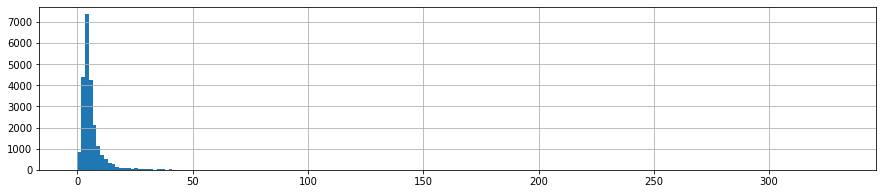

In [ ]:
df_filtered.last_price.hist(bins = 200, figsize = (15,3))

In [ ]:
print(len(df_filtered.query('last_price>40')))

132


In [ ]:
inds = (df_filtered['last_price']<40) | (df_filtered['last_price'].isnull())
df_filtered = df_filtered.loc[inds, :]

In [ ]:
df_filtered.shape[0] / df.shape[0]

0.9603771181042171

**Столбец 'living_area':**

<AxesSubplot:>

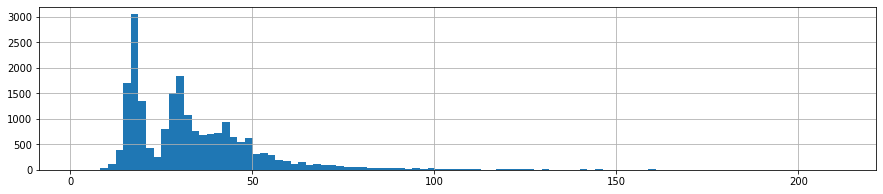

In [ ]:
df_filtered.living_area.hist(bins = 100, figsize = (15,3))

In [ ]:
print(len(df_filtered.query('living_area>120')))

108


In [ ]:
inds = (df_filtered['living_area']<120) | (df_filtered['living_area'].isnull())
df_filtered = df_filtered.loc[inds, :]

<AxesSubplot:>

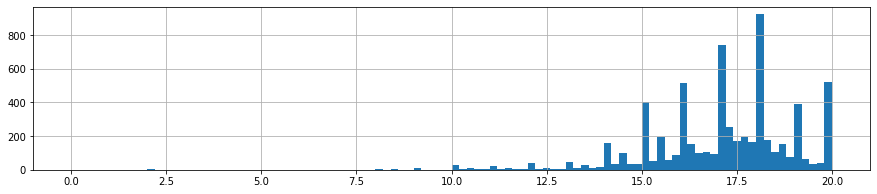

In [ ]:
df_filtered.living_area.hist(bins = 100, figsize = (15,3), range=(0,20))

In [ ]:
print(len(df_filtered.query('living_area<11')))

73


In [ ]:
inds = (df_filtered['living_area']>11) | (df_filtered['living_area'].isnull())
df_filtered = df_filtered.loc[inds, :]

In [ ]:
df_filtered.shape[0] / df.shape[0]

0.9517985305983777

**Столбец 'kitchen_area':**

<AxesSubplot:>

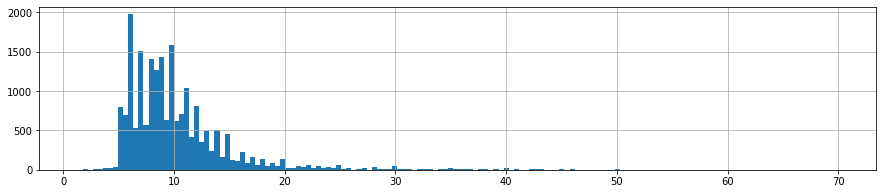

In [ ]:
df_filtered.kitchen_area.hist(bins = 150, figsize = (15,3))

In [ ]:
print(len(df_filtered.query('kitchen_area>35')))

147


In [ ]:
inds = (df_filtered['kitchen_area']<35) | (df_filtered['kitchen_area'].isnull())
df_filtered = df_filtered.loc[inds, :]

In [ ]:
df_filtered.shape[0] / df.shape[0]

0.9447488002717969

In [ ]:
print(len(df_filtered.query('kitchen_area<4.5')))

56


In [ ]:
inds = (df_filtered['kitchen_area']>4.5) | (df_filtered['kitchen_area'].isnull())
df_filtered = df_filtered.loc[inds, :]

In [ ]:
df_filtered.shape[0] / df.shape[0]

0.9419883636981357

**Столбец 'floors_total':**

<AxesSubplot:>

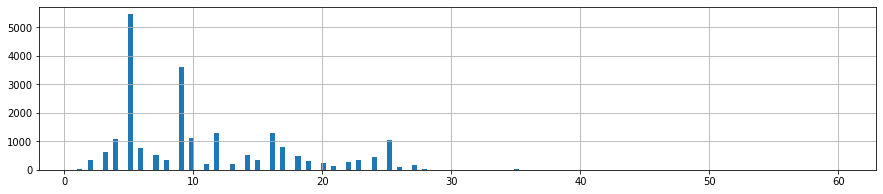

In [ ]:
df_filtered.floors_total.hist(bins = 150, figsize = (15,3))

In [ ]:
print(len(df_filtered.query('floors_total>30')))

29


In [ ]:
inds = (df_filtered['floors_total']<30) | (df_filtered['floors_total'].isnull())
df_filtered = df_filtered.loc[inds, :]

In [ ]:
df_filtered.shape[0] / df.shape[0]

0.940756784303733

Мы успешно **избавились от аномальных значений**, потеряв менее **6%** данных!

In [ ]:

(
    df_filtered[['rooms', 'total_area', 'ceiling_height', 'days_exposition', 'last_price', 'living_area',  'kitchen_area',
          'floor', 'floors_total']]
    .apply (['count', 'min', 'max'])   
    .style.format("{:,.2f}")
)

,rooms,total_area,ceiling_height,days_exposition,last_price,living_area,kitchen_area,floor,floors_total
count,"22,152.00","22,152.00","13,580.00","22,152.00","22,152.00","20,369.00","20,064.00","22,152.00","22,152.00"
min,0.00,20.10,2.25,0.00,0.43,11.10,4.60,1.00,1.00
max,7.00,295.00,3.98,"1,580.00",39.99,119.90,34.80,27.00,29.00


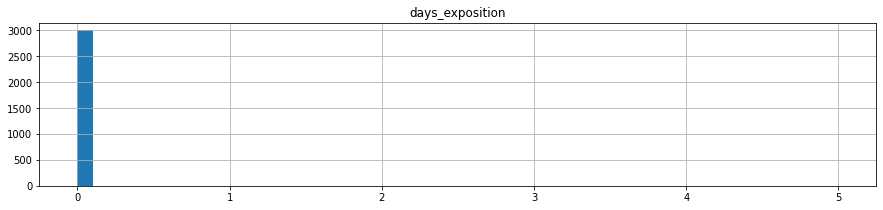

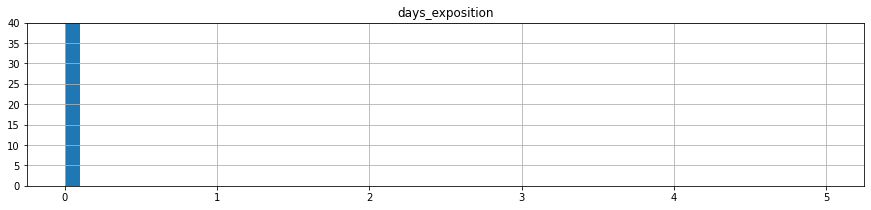

In [ ]:

df_filtered.hist(column = 'days_exposition', bins = 50, figsize = (15,3), range = (0,5));

df_filtered.hist(column = 'days_exposition', bins = 50, figsize = (15,3), range = (0,5))
plt.ylim(0, 40);

# ИССЛЕДОВАТЕЛЬСКИЙ АНАЛИЗ ДАННЫХ:

## Исследуем отдельные параметры:

Сейчас мы изучим и опишем отдельные параметры датафрейма

**Общая площадь:**

In [ ]:
df_filtered['total_area'].describe()

count    22152.000000
mean        57.539135
std         25.247117
min         20.100000
25%         40.000000
50%         51.700000
75%         68.000000
max        295.000000
Name: total_area, dtype: float64

In [ ]:
sns.set_theme(style="darkgrid")


<AxesSubplot:xlabel='total_area'>

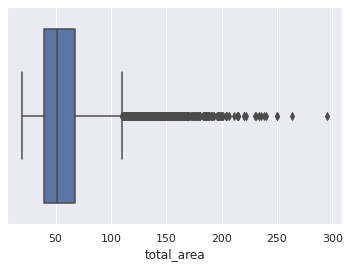

In [ ]:
sns.boxplot(data=df_filtered, x='total_area')

Ожидаемо площадь квартир имеет большое количество выбросов вправо. Чтобы посмотреть информативную гистограмму мы отрежем слишком большие значения:

Я решил задать правую границу в **120** квадратных метров:

In [ ]:
area_hist = df_filtered.loc[(df['total_area']<120)]

<AxesSubplot:xlabel='total_area', ylabel='Count'>

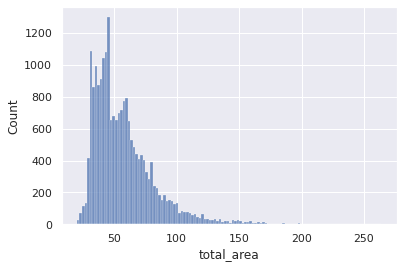

In [ ]:
sns.histplot(data=area_hist, x='total_area', bins=120)

In [ ]:
area_hist['total_area'].describe()

count    21142.000000
mean        57.508478
std         25.181127
min         20.100000
25%         40.000000
50%         51.600000
75%         68.000000
max        263.800000
Name: total_area, dtype: float64

*Вывод:*

*   **Среднее** значение равно **54.3**, **Медианное** - **55**
*   Большинство значений лежат в диапазоне от **39** до **65** квадратных метров.
*   На гистограмме есть несколько пиков, видимо это наиболее частые метражи **однокомнатных**, **двухкомнатных** и **трехкомнатных** квартир.
*   **Распределение скошено вправо**, аномально большие квартиры встречаются намного чаще, чем аномально маленькие.




**Жилая площадь:**

In [ ]:
df_filtered['living_area'].describe()

count    20369.000000
mean        32.955173
std         16.401056
min         11.100000
25%         18.600000
50%         30.000000
75%         42.000000
max        119.900000
Name: living_area, dtype: float64

<AxesSubplot:xlabel='living_area'>

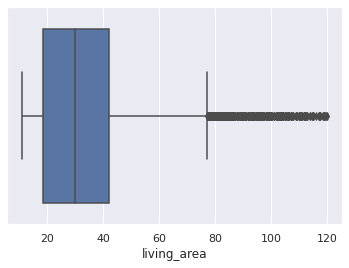

In [ ]:
sns.boxplot(data=df_filtered, x='living_area')

Отрежем выбивающиеся значения и изучим то, что получилось:

In [ ]:
living_area_hist = df_filtered.loc[(df['living_area']<90)]

<AxesSubplot:xlabel='living_area', ylabel='Count'>

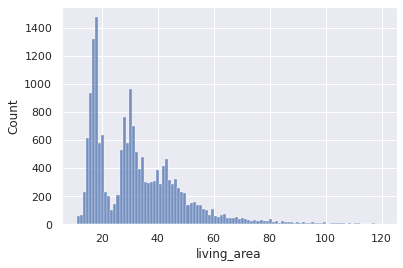

In [ ]:
sns.histplot(data=living_area_hist, x='living_area', bins=100)

In [ ]:
living_area_hist['living_area'].describe()

count    18341.000000
mean        32.949347
std         16.429467
min         11.100000
25%         18.600000
50%         30.000000
75%         42.000000
max        119.900000
Name: living_area, dtype: float64

Минимальное значение - **2**. Это кажется подозрительным, но возможно это не ошибка, а например маленькая квартира-студия с отделённым спальным местом, всё может быть.

*Вывод:*

*    **Среднее** значение равно **31.8**, **Медианное** - **30**
*    Большинство значений лежат в диапазоне от **18** до **41** квадратных метров.
*   Распределение так же **скошено вправо, однако оно плотнее**. Видимо при проектировании квартир жилая площадь чаще оказывается одинаковой для однокомнатных, двухкомнатных и трехкомнатных квартир, чем общая площадь.
*   Мы снова видим **три пика**, которые вероятнее всего показывают самую частовстречаюмую жилую площадь для **однокомнатной, двухкомнатной** и **трехкомнатной** квартиры.



**Площадь кухни:**

<AxesSubplot:xlabel='kitchen_area'>

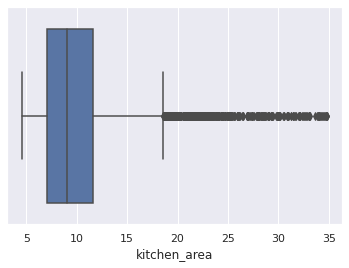

In [ ]:
sns.boxplot(data=df_filtered, x='kitchen_area')

In [ ]:
kitchen_area_hist = df_filtered.loc[(df['kitchen_area']<20)]

<AxesSubplot:xlabel='kitchen_area', ylabel='Count'>

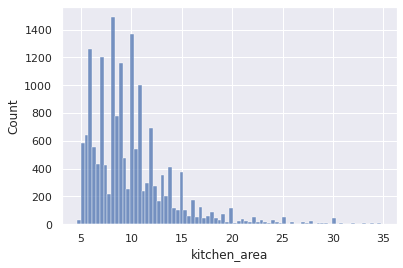

In [ ]:
sns.histplot(data=kitchen_area_hist, x='kitchen_area', bins=80)

In [ ]:
kitchen_area_hist['kitchen_area'].describe()

count    17193.000000
mean        10.056261
std          4.202065
min          4.600000
25%          7.000000
50%          9.000000
75%         11.600000
max         34.800000
Name: kitchen_area, dtype: float64

Минимальное значение снова выглдит подозрительно, но я не уверен что это ошибка. Совмещенная с гостинной кухня довольно популярное явление в наши дни, сложно представить кто как измеряет и записывает "жилую" и "кухонную" площадь в таком случае. В маленькой студии опять же к кухне может быть отнесена только совсем маленькая кухонная поверхность.

*Вывод:*

*    **Среднее** значение равно **9.5**, **Медианное** - **9**
*    Большинство значений лежат в диапазоне от **7** до **11** квадратных метров.
*   Распределение вновь **скошено вправо** и является **ещё более компактным**. Площадь кухни ещё чаще оказывается "типовой", чем общая площадь и жилая площадь


**Цена объекта:**

<AxesSubplot:xlabel='last_price'>

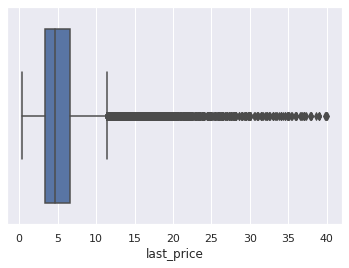

In [ ]:
sns.boxplot(data=df_filtered, x='last_price')

Выбросов много и они выбрасываются очень далеко.

Это ожидаемо, ведь цена - это самый комплексный параметр объекта жилья и он зависит от множества параметров, так что причина такого не компактного распределения ясна.

In [ ]:
df_filtered['last_price'].sample(20)

8263      4.400
17804     5.700
8564      4.200
16377     3.750
9861      6.100
6177      5.110
14639     3.150
6334      3.050
3707      4.500
1094      2.699
19361     9.500
1717      0.990
21143     5.300
13793     1.350
6505     11.900
16601     3.450
22067     4.100
5517      5.100
5140      5.300
2069      7.500
Name: last_price, dtype: float64

покрутив **sample** можно прийти к выводу, что большая часть квартир стоит дешевле **15 миллионов**. Но не будем рубить с плеча, для начала отрежем те, что стоят больше **25 миллионов**

<AxesSubplot:xlabel='last_price'>

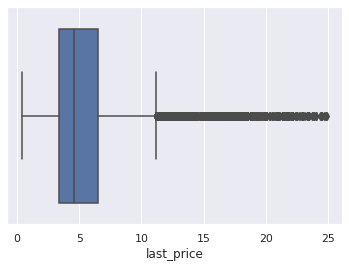

In [ ]:
price_hist = df_filtered.loc[(df_filtered['last_price']<25)]
sns.boxplot(data=price_hist, x='last_price')

<AxesSubplot:xlabel='last_price', ylabel='Count'>

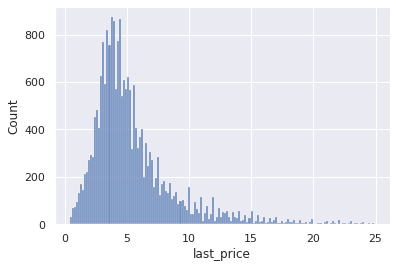

In [ ]:
sns.histplot(data=price_hist, x='last_price', bins=150)

Кажется мы выбрали правильную границу. Мы видим красивый график плавно скошенный вправо. Квартир дороже 15 миллионов не очень много, но они всё еще составляют заметную долю на рынке.

In [ ]:
price_hist['last_price'].describe()

count    21958.000000
mean         5.488842
std          3.420226
min          0.430000
25%          3.400000
50%          4.587000
75%          6.500000
max         24.900000
Name: last_price, dtype: float64

*Вывод:*

*    **Среднее** значение равно **5.4**, **Медианное** - **4.5**
*    Большинство значений лежат в диапазоне от **3.4** до **6.5** миллионов рублей
*   Распределение вновь **скошено вправо** и не является **компактным**. Это не удивительно, на стоимость квартиры влияет множество параметров, которые не отображены в данной табице - мебель, качество ремонта и т.д.
*   На этот раз мы **не видим харрактерных пиков**, которые показали бы нам самую частотную стоимость квартир в зависимости от числа комнат.

**Количество комнат:**

In [ ]:
rooms_hist = df_filtered

In [ ]:
rooms_hist['rooms'].describe()

count    22152.000000
mean         2.029523
std          0.978406
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          7.000000
Name: rooms, dtype: float64

Мы можем сделать довольно очевидный вывод - **большинство квартир имеют от 1 до 3 комнат**. Хоть в современных ЖК часто в плане этажа присутствуют четрёхкомнатные и более квартиры, но **их доля всё еще очень мала**.

Для наглядности сделаем сводную таблицу при помощи sql-запроса:

In [ ]:
df_filtered.to_sql('real_estate',con,index=False,if_exists='replace')

In [ ]:
sql = '''
SELECT t.rooms,
COUNT(*) AS cnt

FROM real_estate t
GTOUP BY t.rooms
'''
rooms = select(sql)
rooms

,rooms,cnt
0,0,168
1,1,7593
2,2,7537
3,3,5495
4,4,1064
5,5,234
6,6,47
7,7,14


Мы видим **187** объектов для которого значение комнат указано как **"0"**. Сложно утверждать является это технической ошибкой или так могли заполнить объявления продавцы студий или комнат или долей квартиры.

<AxesSubplot:xlabel='rooms', ylabel='cnt'>

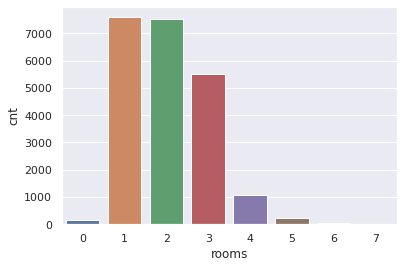

In [ ]:
sns.barplot(data=rooms, x="rooms", y="cnt")

*Выводы:*
*   Большинство квартир имеют **1**, **2** или **3** комнаты
*   Четырехкомнатных квартир не так уж и мало
*   Квартиры с числом комнат **5 и более** встречаются совсем редко
*   Не совсем понятно что имеется ввиду под числом комнат **0**, ещё трудно понять в какую категорию относятся популярные нынче **квартиры-студии**
*   Для меня стало неожиданностью, что **двухкомнатных** квартир совсем чуть-чуть меньше, чем  **однакомнатных**





**Высота потолков:**



<AxesSubplot:xlabel='ceiling_height'>

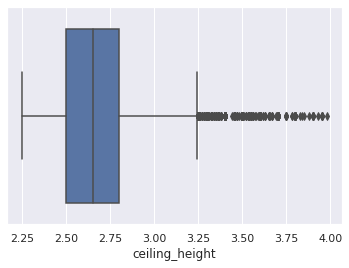

In [ ]:
ceiling_hist = df_filtered
sns.boxplot(data=ceiling_hist, x='ceiling_height')

отрежем потолки свыше **3.5** метров:

In [ ]:
ceiling_hist = ceiling_hist.loc[(ceiling_hist['ceiling_height']<3.5)]

<AxesSubplot:xlabel='ceiling_height'>

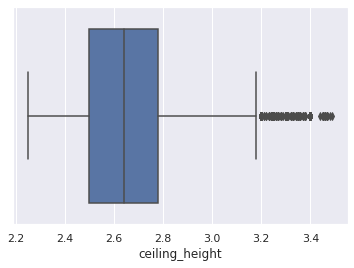

In [ ]:
sns.boxplot(data=ceiling_hist, x='ceiling_height')

In [ ]:
ceiling_hist['ceiling_height'].describe()

count    13336.000000
mean         2.690880
std          0.204692
min          2.250000
25%          2.500000
50%          2.640000
75%          2.780000
max          3.490000
Name: ceiling_height, dtype: float64

<AxesSubplot:xlabel='ceiling_height', ylabel='Count'>

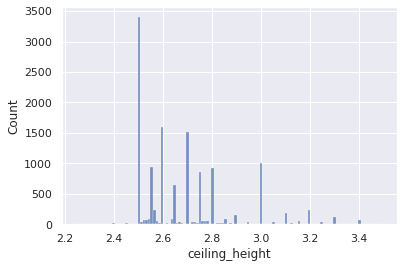

In [ ]:
sns.histplot(data=ceiling_hist, x='ceiling_height', bins=120)

*Вывод:*

*    **Среднее** значение равно **2.68**, **Медианное** - **2.64**
*    Большинство значений лежат в диапазоне от **2.5** до **2.8** метров
*   Распределение вновь **скошено вправо**
*   Высота потолка, в отличае от площади явно не зависит от количества комнат в квартире. Я предпологаю, что пики в левой части связаны с типовой высотой потолков в советских серийных домах, а пик в районе трех метров может быть связан как с исторической так и с современной застройкой.

**Этаж квартиры:**

<AxesSubplot:xlabel='floor'>

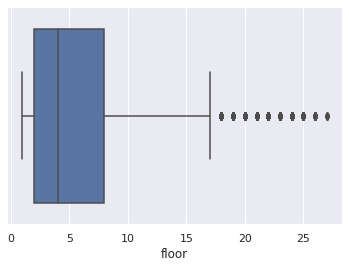

In [ ]:
floor_hist = df_filtered
sns.boxplot(data=floor_hist, x='floor')

Выбросы ожидаемо не так страшны, посмотрим **гистограмму**:

<AxesSubplot:xlabel='floor', ylabel='Count'>

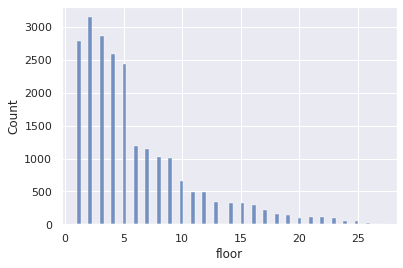

In [ ]:
sns.histplot(data=floor_hist, x='floor', bins=80)

In [ ]:
floor_hist['floor'].describe()

count    22152.000000
mean         5.875045
std          4.862008
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         27.000000
Name: floor, dtype: float64

*Вывод:*
*    **Среднее** значение равно **5.8**, **Медианное** - **4**
*    Большинство значений лежат в диапазоне от **2** до **8** этажей

**Тип этажа квартиры:**

Нампомню, что мы написали функцию и категоризировали этаж как **"первый", "последний"** или **"другой"**

In [ ]:
sql ='''
SELECT t.floor_type,
COUNT(*) AS cnt

FROM real_estate t
GROUP BY t.floor_type
'''

In [ ]:
floors_cat = select(sql)
floors_cat


,floor_type,cnt
0,другой,16285
1,первый,2781
2,последний,3086


<AxesSubplot:xlabel='floor_type', ylabel='cnt'>

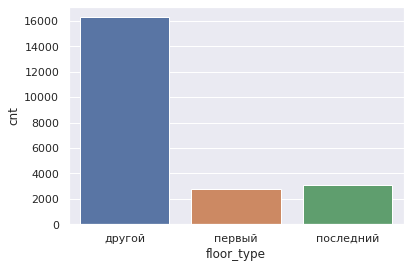

In [ ]:
sns.barplot(data=floors_cat, x="floor_type", y="cnt")

*Вывод:* Квартир на первом и последнем этажах почти одинаковое количество, "других" намного больше.

**Общее количество этажей в доме:**

<AxesSubplot:xlabel='floors_total'>

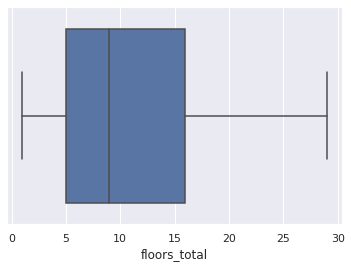

In [ ]:
sns.boxplot(data=df_filtered, x='floors_total')

Совсем не страшно, не будем ничего отрезать:

<AxesSubplot:xlabel='floor', ylabel='Count'>

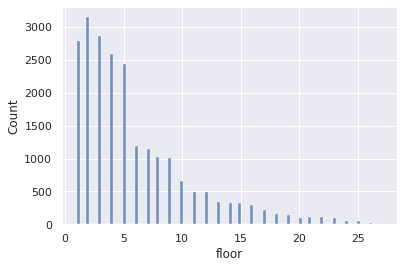

In [ ]:
sns.histplot(data=df_filtered, x='floor', bins=100)

In [ ]:
df_filtered['floors_total'].describe()

count    22152.000000
mean        10.699756
std          6.536425
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         29.000000
Name: floors_total, dtype: float64

*Вывод:*

*    **Среднее** значение равно **10.7**, **Медианное** - **9**
*    Большинство значений лежат в диапазоне от **5** до **14** этажей
*   В Санкт-Петербурге кажется действительно пока ещё не много жилых высоток.

**Расстояние до центра города в метрах:**

<AxesSubplot:xlabel='city_centers_nearest'>

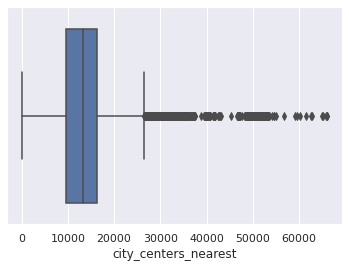

In [ ]:
sns.boxplot(data=df_filtered, x='city_centers_nearest')

In [ ]:
center_hist = df_filtered.loc[(df_filtered['city_centers_nearest']<40000)]

<AxesSubplot:xlabel='city_centers_nearest', ylabel='Count'>

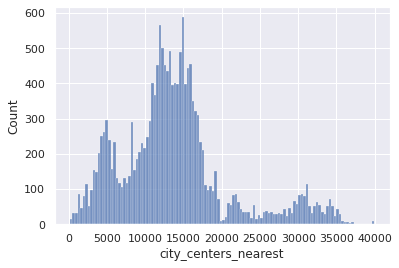

In [ ]:
sns.histplot(data=center_hist, x='city_centers_nearest', bins=120)

In [ ]:
center_hist['city_centers_nearest'].describe()

count    16555.000000
mean     13797.720145
std       7230.408236
min        181.000000
25%       9551.000000
50%      13138.000000
75%      16183.000000
max      39936.000000
Name: city_centers_nearest, dtype: float64

*Вывод:*

*    **Среднее** значение равно **13835**, **Медианное** - **13163**
*    Большинство значений лежат в диапазоне от **9600** до **16100** метров
*   график впервые в нашем исследовании имеет такую форму. Я бы предположил ,что малый пик слева показывает наиболее частое расстояние в рамках "старого города", а средний большой пик - наиболее частое расстояние в новых районах навостроек вокруг города


**Расстояние до ближайшего аэропорта:**

<AxesSubplot:xlabel='airports_nearest'>

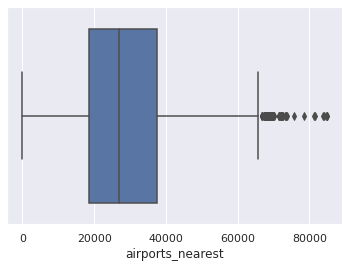

In [ ]:
sns.boxplot(data=df_filtered, x='airports_nearest')

In [ ]:
airport_hist = df.loc[(df['airports_nearest']<65000)]

<AxesSubplot:xlabel='airports_nearest', ylabel='Count'>

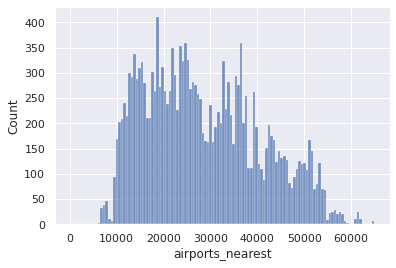

In [ ]:
sns.histplot(data=airport_hist, x='airports_nearest', bins=120)

In [ ]:
airport_hist['airports_nearest'].describe()

count    17914.000000
mean     28529.366362
std      12229.613381
min          0.000000
25%      18518.000000
50%      26610.500000
75%      36964.000000
max      64956.000000
Name: airports_nearest, dtype: float64

*Вывод:*

*    **Среднее** значение равно **28529**, **Медианное** - **26610**
*    Большинство значений лежат в диапазоне от **18500** до **37000** метров
*   график скошен вправо
*   По всей видимости непосредственно около аэропорта жилых домов нет
*   Можно предположить, что аэропорт находится в значительном удалении от черты города




**Расстояние до ближайшего парка:**

<AxesSubplot:xlabel='parks_nearest'>

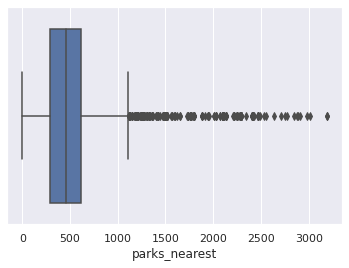

In [ ]:
sns.boxplot(data=df_filtered, x='parks_nearest')

In [ ]:
park_hist = df.loc[(df['parks_nearest']<1500)]

<AxesSubplot:xlabel='parks_nearest', ylabel='Count'>

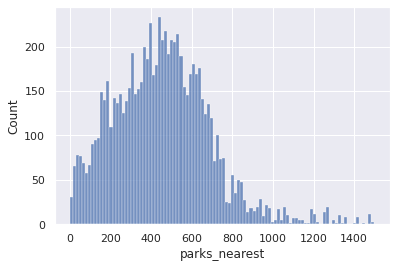

In [ ]:
sns.histplot(data=park_hist, x='parks_nearest', bins=100)

In [ ]:
park_hist['parks_nearest'].describe()

count    7852.000000
mean      455.263882
std       241.063295
min         1.000000
25%       284.000000
50%       447.000000
75%       601.000000
max      1499.000000
Name: parks_nearest, dtype: float64

*Вывод:*

*    **Среднее** значение равно **455**, **Медианное** - **447**
*    Большинство значений лежат в диапазоне от **284** до **601** метров
*   график близок к нормальному распределению, Но немного "обрезан" слева и имеет "хвост" вправо.
*   С обеспеченностью парками у жителей СПБ всё в порядке.





**День и месяц публикации объявления:**

*День*

In [ ]:
sql ='''
SELECT t.day,
COUNT(*) AS cnt

FROM real_estate t
GROUP BY t.day
'''
day = select(sql)

<AxesSubplot:xlabel='day', ylabel='cnt'>

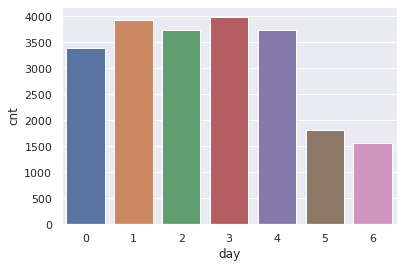

In [ ]:
sns.barplot(data=day, x="day", y="cnt")

*Вывод:* Больше всего объявлений публикуется во вторник и четверг, хотя значения будних дней достаточно близкие. А вот в выходные заниматься публикаций объявлений о продаже недвижимости питербуржцы явно не любят.

*Месяц*

In [ ]:
sql ='''
SELECT t.month,
COUNT(*) AS cnt

FROM real_estate t
GROUP BY t.month
'''
month = select(sql)

<AxesSubplot:xlabel='month', ylabel='cnt'>

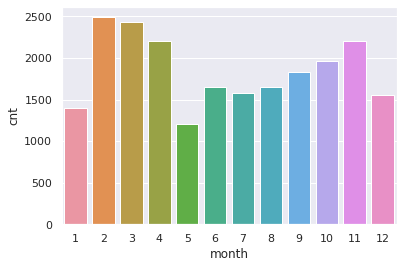

In [ ]:
sns.barplot(data=month, x="month", y="cnt")

*Вывод:* Интересная картина. Больше всего объявлений публикуется в **феврале, марте и апреле**. Псоле чего в **мае** происходит резкий спад активности, которая постепенно растёт до **ноября**, однако **в районе нового года** снова сильно снижается.

## Исследуем время размещения объявлений:

**Как быстро продавались квартиры:**

Внимательно изучим столбец **"days_exposition"**

Мы помним из начала нашего проекта, что в этом столбце были значения 0 и пропуски, которые мы сами заполнили нулями, их мы учитывать при подсчёте не будем:

In [ ]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22152 entries, 0 to 22755
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   total_images             22152 non-null  int64  
 1   last_price               22152 non-null  float64
 2   total_area               22152 non-null  float64
 3   first_day_exposition     22152 non-null  object 
 4   rooms                    22152 non-null  int64  
 5   ceiling_height           13580 non-null  float64
 6   floors_total             22152 non-null  float64
 7   living_area              20369 non-null  float64
 8   floor                    22152 non-null  int64  
 9   is_apartment             22152 non-null  int64  
 10  studio                   22152 non-null  int64  
 11  open_plan                22152 non-null  int64  
 12  kitchen_area             20064 non-null  float64
 13  balcony                  22152 non-null  int64  
 14  locality_name         

In [ ]:
df_filtered.query('days_exposition>0')['days_exposition'].describe()

count    19156.000000
mean       183.854980
std        218.279177
min          7.000000
25%         45.000000
50%         99.000000
75%        234.000000
max       1580.000000
Name: days_exposition, dtype: float64

In [ ]:
df_filtered['days_exposition'].describe()

count    22152.000000
mean       158.989075
std        212.497351
min          0.000000
25%         27.000000
50%         77.000000
75%        201.000000
max       1580.000000
Name: days_exposition, dtype: float64

**Среднее** значение - **133**, а **медиана** составляет **69**

Взглянем на **гистограмму**:

<AxesSubplot:xlabel='days_exposition', ylabel='Count'>

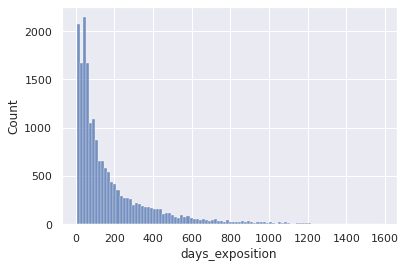

In [ ]:
sns.histplot(data=df_filtered.query('days_exposition>0')['days_exposition'], bins=100)

Подавляющее большинство объявлений закрываются за  **250 дней** , посмотрим на этот отрезок прицельно:

In [ ]:

import matplotlib.pyplot as plt

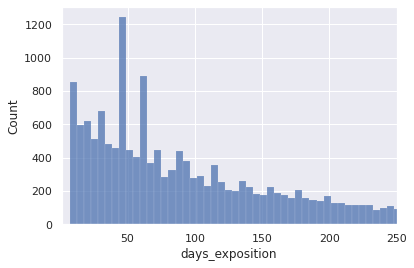

In [ ]:

sns.histplot(data=df_filtered.query('days_exposition>0')['days_exposition'], bins=300)
plt.xlim(1, 250);

Видим несколько аномально высоких значений, применим **value_counts()**, чтобы посмотреть на них:

In [ ]:
df_filtered.query('days_exposition>0')['days_exposition'].value_counts().head(10)

45    867
60    533
7     227
30    201
90    180
14    140
20    136
44    135
9     134
11    133
Name: days_exposition, dtype: int64

Подозрительно. Слишком "ровные" значения оказались наверху. 45, 60, 7, 30, 90

Наверняка это как-то связано с особенностями сервиса размещения объявлений.

Посмотрим на **усатый ящик**:

<AxesSubplot:xlabel='days_exposition'>

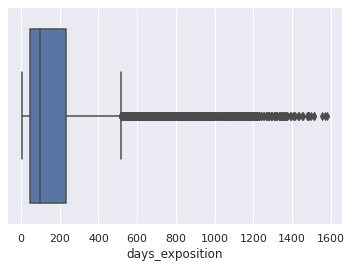

In [ ]:
days_exp = df_filtered.query('days_exposition>0')
sns.boxplot(data=days_exp, x='days_exposition')

In [ ]:
days_exp['days_exposition'].describe()

count    19156.000000
mean       183.854980
std        218.279177
min          7.000000
25%         45.000000
50%         99.000000
75%        234.000000
max       1580.000000
Name: days_exposition, dtype: float64

*Вывод:*

*   **Аномально долгими** мы можем считать продажи, которые выходят за границу правого уса, то есть свыше **450 дней**
*   Выбросов в левую сторону у нас нет, но мы могли бы признать **аномально быстрыми** продажи, которые были совершены ниже значения первого квартиля - то есть менее. чем за **43 дня**.
*   **Среднее** время продажи - 154 дня
*   **Медианное** время продажи - 90 дней





## Исследуем от чего зависит цена:

В этом раделе мы посмотрим от каких параметров сильнее всего завсит стоимость объекта недвижимости

Будем искать корелляцию при помощи **коэфицента корреляции Пирсона** и **визуализации зависимости**:

In [ ]:
area_hist['total_area'].corr(area_hist['last_price'])

0.7660096267235336

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='total_area', ylabel='last_price'>

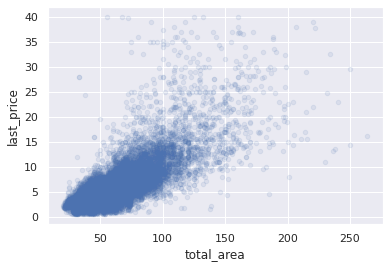

In [ ]:
area_hist.plot(x='total_area', y='last_price', kind='scatter', alpha=0.1)

**Коэфицент корреляции Пирсона** чуть более **0.7**. Между общей площадью и ценой квартиры есть достаточно сильная **прямая взаимосвязь**!

А что насчёт **жилой площади**:

In [ ]:
living_area_hist['living_area'].corr(living_area_hist['last_price'])

0.6664856453301434

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='living_area', ylabel='last_price'>

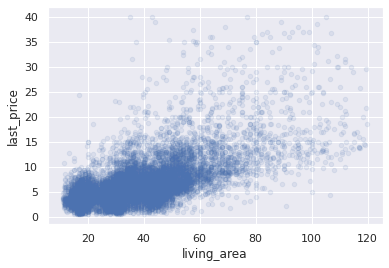

In [ ]:
living_area_hist.plot(x='living_area', y='last_price', kind='scatter', alpha=0.1)

**0.62** ! Между ценой и жилой площадью есть **прямая взаимосвязь**, но она немного слабее, чем между ценой и общей площадью.

**Площадь кухни:**

In [ ]:
kitchen_area_hist['kitchen_area'].corr(kitchen_area_hist['last_price'])

0.5651804386965864

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='kitchen_area', ylabel='last_price'>

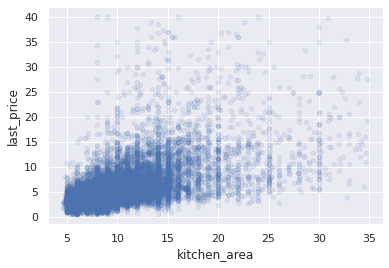

In [ ]:
kitchen_area_hist.plot(x='kitchen_area', y='last_price', kind='scatter', alpha=0.1)

**Прямая взаимосвязь** между ценой и **площадью кухни** есть, но она занчительно ниже, чем у **общей площади** и немного ниже, чем у **жилой площади**.

**Количество комнат:**

In [ ]:
rooms_hist = df_filtered.loc[(df['kitchen_area']<7)]
rooms_hist['rooms'].corr(rooms_hist['last_price'])


0.49521298624048465

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='rooms', ylabel='last_price'>

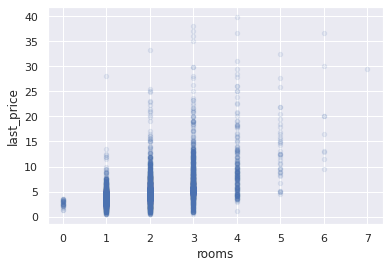

In [ ]:
rooms_hist.plot(x='rooms', y='last_price', kind='scatter', alpha=0.1)

Так же не сильная **прямая завсисимость** - **0.44**

**Этаж, на котором расположена квартира:**

In [ ]:
df_filtered['floor'].corr(df_filtered['last_price'])

0.08047499318695371

Проверим ещё **категорию этажа**:


In [ ]:
df_filtered.to_sql('df_filtered',con,index=False,if_exists='replace')
sql = '''
SELECT t.floor_type,
avg(t.last_price) as price_avg

FROM df_filtered t
GROUP BY t.floor_type
'''
floor_type_pivot = select(sql)

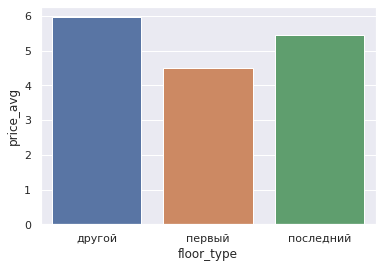

In [ ]:
sns.barplot(data=floor_type_pivot, x="floor_type", y="price_avg");

Достаточно очевидный вывод - квартиры на первом этаже значимо дешевле. На последнем этаже разница не такая большая, но тоже есть.

**День недели, месяц, год:**

In [ ]:
sql = '''
SELECT t.day,
avg(t.last_price) as price_avg

FROM df_filtered t
GROUP BY t.day
'''
day_pivot = select(sql)

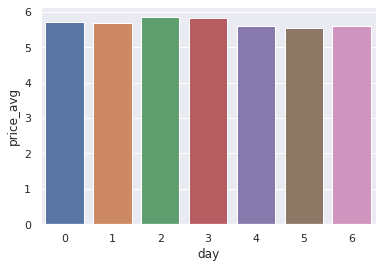

In [ ]:
sns.barplot(data=day_pivot, x="day", y="price_avg");

Показатели по дням недели достаточно ровные. В **четверг** немного выше, а в **выходные** немного ниже. Любопытно...

In [ ]:
sql = '''
SELECT t.month,
avg(t.last_price) as price_avg

FROM df_filtered t
GROUP BY t.month
'''
month_pivot = select(sql)

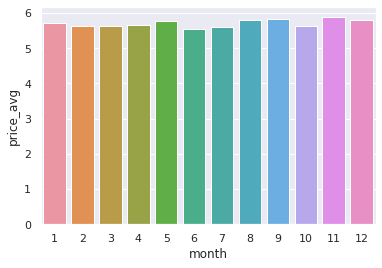

In [ ]:
sns.barplot(data=month_pivot, x="month", y="price_avg");

Снова достаточно ровно. небольшой пик в **апреле** и снижение в **октябре**.

In [ ]:
sql = '''
SELECT t.year,
avg(t.last_price) as price_avg

FROM df_filtered t
GROUP BY t.year
'''
year_pivot = select(sql)

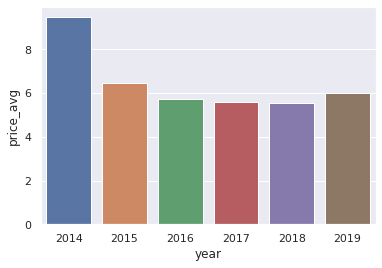

In [ ]:
sns.barplot(data=year_pivot, x="year", y="price_avg");

Очень большая разница. Мксимальное значение в **2014м** максимальное начение, после этого резкое падение в **2015** , плавное снижение до **2018** и небольшой подъём в **2019**

### Средняя цена квадратного метра в 10 населённых пунках с наибольшим числом объявлений:

Сгруппируем, отсортируем и посмотрим:

In [ ]:
sql = '''
SELECT t.locality_name,
COUNT(*) AS cnt,
AVG(t.price_per_m2) AS price_per_m2_avg


FROM real_estate t
GROUP BY t.locality_name
ORDER BY count(*) DESC
'''
locality = select(sql)
locality.round(1)
locality.head(10)

,locality_name,cnt,price_per_m2_avg
0,санкт-петербург,14531,111046.002915
1,поселок мурино,523,85383.501284
2,поселок шушары,426,78614.940974
3,всеволожск,385,68674.585868
4,пушкин,347,102178.067161
5,колпино,325,75219.916564
6,поселок парголово,306,89637.223140
7,гатчина,292,68726.512537
8,деревня кудрово,286,92413.495092
9,выборг,226,58125.737725


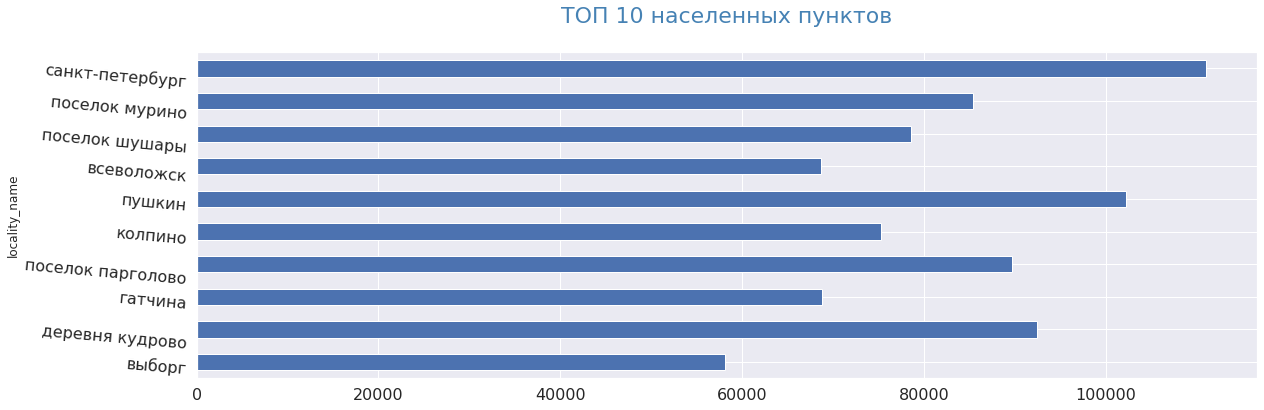

In [ ]:
locality.head(10).sort_values(by = 'cnt', ascending = True).plot(x='locality_name', y='price_per_m2_avg',kind = 'barh', figsize = (19,6), rot = -5, legend = False, fontsize = 16).set_title('ТОП 10 населенных пунктов' + "\n", fontsize = 22, color = 'SteelBlue');

Задание выполнено! Мы видим, что самая высокая стоимость квадратного метра в **Санкт-Петербурге** - **115667 руб/м2** (не удивительно), а самая низкая в **Всеволжске** - **67434 руб/м2**

### Исследуем как расстояние от центра влияет на стоимость квартир в Санкт-Петербурге:

In [ ]:
sql = '''
SELECT t.city_centers_nearest_km,
t.last_price,
t.price_per_m2
FROM real_estate t
WHERE t.locality_name == 'санкт-петербург'
AND t.city_centers_nearest_km IS NOT NULL

'''
spb = select(sql)
spb.head(5)



,city_centers_nearest_km,last_price,price_per_m2
0,16.0,13.000,120370.370370
1,14.0,5.196,92785.714286
2,12.0,7.915,110544.692737
3,15.0,5.400,88524.590164
4,14.0,5.050,127525.252525


Получилось, изучаем дальше:

In [ ]:
spb.to_sql('spb',con,index=False,if_exists='replace')
sql = '''
SELECT t.city_centers_nearest_km,
COUNT(*) AS cnt,
AVG(t.price_per_m2) AS price_per_m2_avg,
AVG(t.last_price) AS price_avg

FROM spb t
GROUP BY t.city_centers_nearest_km
ORDER BY t.city_centers_nearest_km
'''
spb_grouped = select(sql)
spb_grouped

,city_centers_nearest_km,cnt,price_per_m2_avg,price_avg
0,0.0,16,158814.491576,15.584847
1,1.0,150,143531.250893,11.753800
2,2.0,242,132516.799878,11.013062
3,3.0,305,117327.919114,9.605914
4,4.0,616,125691.451404,10.411370
5,5.0,790,133493.788481,10.829562
6,6.0,524,136250.150215,10.092291
7,7.0,358,137535.936790,10.200402
8,8.0,555,123103.434250,8.740968
9,9.0,556,113355.349301,6.948844


При изучении этой таблицы создаётся **ощущение**, что действительно есть тенденция к тому, что **при удалении от центра стоимоть квадратного метра снижается**, однако имеются некоторые отклонения, такую картину могли бы создать например скопления элитных жилых комплексов, расположенных в удалении от центра.

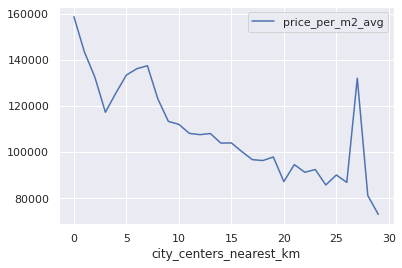

In [ ]:
spb_grouped.plot(x='city_centers_nearest_km', y='price_per_m2_avg');

Очень интересная картина. **Для первых километров** от центра действительно **происходит резкое падение** стоимости квадратного метра. Дальше **в районе 3 км** от центра вновь начинается **подъем**, далее плавное снижение **до 26 км** и какой-то непонятный **аномальный пик**...

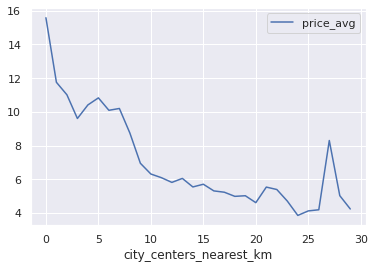

In [ ]:
spb_grouped.plot(x='city_centers_nearest_km', y='price_avg');

График средней цены в целом похож на график средней цены квадратного метра, подозрительные пики на своих местах.

Изучив таблицу глазами мы видим, что на удалении 27 км объектов очень мало и они имеют аномально высокую цену. Вероятно это какой-то необычный дорогой жилой комплекс. На удалении 28 и 29 км тоже очень мало объявлений, их можно смело отбросить.

<AxesSubplot:xlabel='city_centers_nearest_km'>

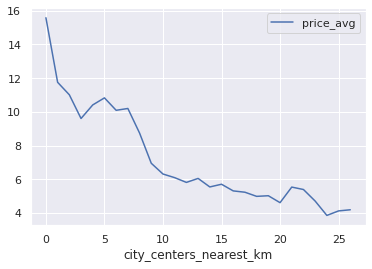

In [ ]:
spb_grouped.query('city_centers_nearest_km<27').plot(x='city_centers_nearest_km', y='price_avg')

Причину аномального пика в районе 27го километра мы установили - слишком мало обявлений одно или несколько из которых оказались аномально дорогими.

Что же происходит на отрезке с 4го по 7й километр?

Объянить эту аномалию недостатком объявлений нельзя, на этом расстоянии их достаточно много. И я попытаюсь сделать предположение.

Я думаю, что возможная причина такого пика - это **условная точка, которая на картах считается центром Санкт-Петербурга.**

В подтверждение своей версии привожу скриншоты карт:

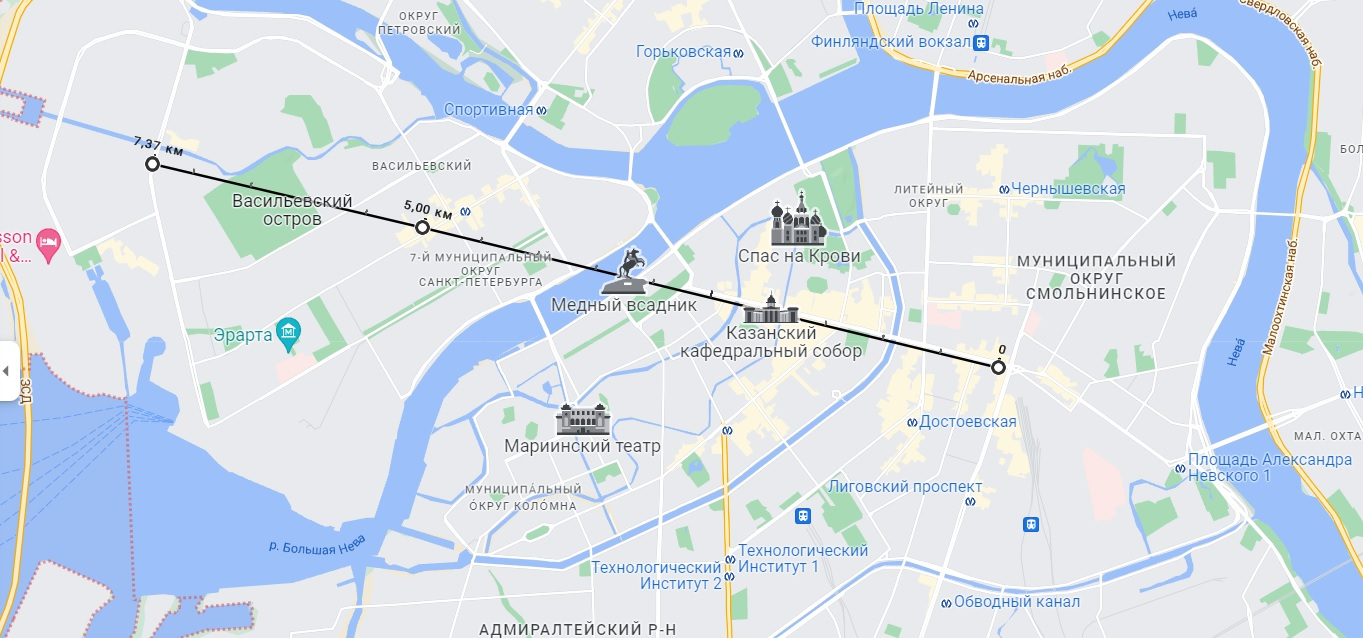

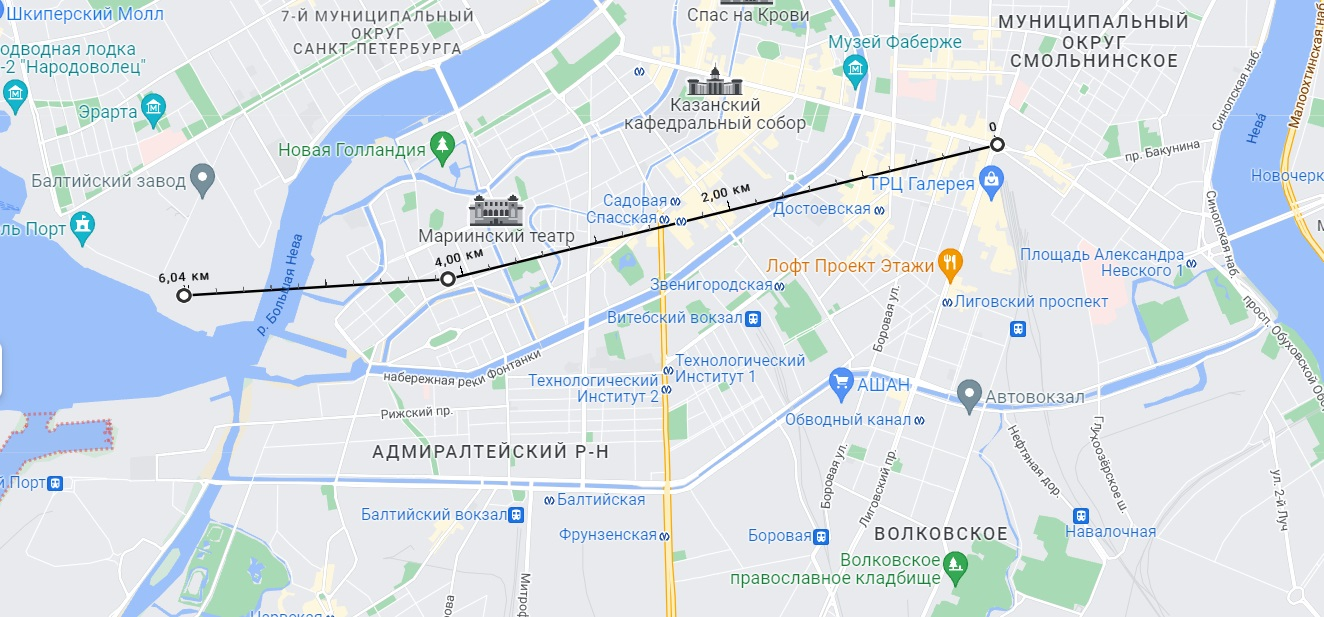

На таком удалении от **"центра"** находится напрмиер большая часть **Васильевского Острова**(скриншот 1), который насколько я помню считается дорогим районом. Или например район в котором распологаются множество достопримечательностей, канал Грибоедова, живописне улицы и набережная Большой Невы (скриншот 2)

Посмотрим ещё цифры:

In [ ]:
df_filtered.to_sql('df_filtered',con,index=False,if_exists='replace')
sql = '''
SELECT t.floor_type, t.floors_total, t.ceiling_height,
t.total_area, t.kitchen_area, t.living_area

FROM df_filtered t
WHERE t.city_centers_nearest_km BETWEEN 4 AND 7
'''
between_4_and_7 = select(sql)

In [ ]:
sql = '''
SELECT t.floor_type, t.floors_total, t.ceiling_height,
t.total_area, t.kitchen_area, t.living_area

FROM df_filtered t
WHERE t.city_centers_nearest_km NOT IN (4, 5, 6, 7)
'''
other = select(sql)

In [ ]:
between_4_and_7.describe()

,floors_total,ceiling_height,total_area,kitchen_area,living_area
count,2288.000000,1429.000000,2288.00000,2064.000000,2080.000000
mean,7.855769,3.000182,78.91892,12.625896,45.548870
std,4.196861,0.295007,34.08746,5.286613,22.249002
min,2.000000,2.400000,21.00000,5.000000,11.700000
25%,5.000000,2.770000,53.27500,9.000000,29.000000
50%,6.000000,3.000000,72.00000,11.405000,41.850000
75%,10.000000,3.200000,97.22500,15.000000,57.502500
max,25.000000,3.980000,295.00000,34.800000,119.900000


In [ ]:
other.describe()

,floors_total,ceiling_height,total_area,kitchen_area,living_area
count,14556.000000,9314.000000,14556.000000,13371.000000,13581.000000
mean,11.774457,2.685246,56.793985,9.955406,32.473385
std,6.593567,0.214462,24.085960,4.121131,15.641606
min,1.000000,2.260000,20.100000,4.600000,11.100000
25%,5.000000,2.500000,40.000000,7.000000,18.700000
50%,9.000000,2.600000,51.000000,9.000000,30.000000
75%,16.000000,2.750000,67.000000,11.500000,41.200000
max,29.000000,3.950000,250.200000,34.780000,119.300000


Судя по цифрам средних значений на таком удалении от центра находится большое количество квартир в исторической застройке - на это нам указывают высокие потолки, меньшая этажность и большая площадь квартир, чем на остальных значениях удаленности от центра!

In [ ]:
spb = spb.query('city_centers_nearest_km < 26')

In [ ]:
spb.head(10)

,city_centers_nearest_km,last_price,price_per_m2
0,16.0,13.000,120370.370370
1,14.0,5.196,92785.714286
2,12.0,7.915,110544.692737
3,15.0,5.400,88524.590164
4,14.0,5.050,127525.252525
5,14.0,4.650,119230.769231
6,11.0,6.700,81707.317073
7,15.0,4.180,116111.111111
8,11.0,3.250,104838.709677
9,13.0,14.200,117355.371901


In [ ]:
print(len(spb))

14430


Посмотрим что скажет статистика:

In [ ]:
spb['city_centers_nearest_km'].corr(spb['price_per_m2'])

-0.33779168516070235

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='city_centers_nearest_km', ylabel='price_per_m2'>

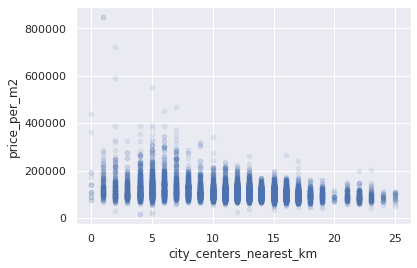

In [ ]:
spb.plot(x='city_centers_nearest_km', y='price_per_m2', kind='scatter', alpha=0.1)

*Вывод:*

*  **Обратная взаимосвязь** между удаленностью от центра и ценой квадратного метра разумеется есть, но она **совсем не сильная** **(-0.31)**
*   Интересно было бы узнать **причину появления пика между 4 и 9 км**, но вероятно для этого нужно больше данных
*   Мы видели очень странный **аномальный пик между 26 и 28 км**, очень странно





# ОБЩИЙ ВЫВОД:

В рамках этого проекта мы получили таблицу с данными по объявлениям о продаже квартир в Санкт-Петербурге и окрестных населенных пнуктах. После предобработки данных и добавления новых столбцов мы начали исследование и пришли к следующим выводам:


*   Цена объекта корелирует с различными параметрами, особенно сильно с **общей площадью** - коэфицентр корреляции равен **0.71**
*   Среднее значение срока продажи квартир **154 дня**, медианное - **90 дней**
*   Разные параметры объектов недвижимости имеют **сильно отличающийся харрактер распределения**.
*   Среди 10 населенных рунктов с наибольшим количеством объявлений наибольшая цена квадратного метра в **Санкт-Петербурге (115667 руб/м2)**, а наименьшая в **Всеволжске (67434 руб/м2)**
*   В **Санкт-Петербурге** стоимость квадратного метра завсит от близости центра не так сильно, как можно было бы предположить. Сильная прямая завсимость наблюдается на отдельных участках графика, однако есть аномальные зоны, ситуация явно сложнее, чем могло показаться сначала.

